<a href="https://colab.research.google.com/github/pablocontini/Taller-de-Procesamiento-de-Datos/blob/main/TPS03_Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enunciado

**Regresión Logística**

Se desea desarrollar un clasificador de imágenes de gatos y perros utilizando regresión logística.

Para ello descargar la base de datos $\texttt{dog-and-cat-classification-dataset}$ de kaggle.

Ayuda: la siguiente instrucción puede ayudar con la descarga:
$\texttt{kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")}$

(a) *Análisis:*

1. Calcular la función inversa $\sigma^{-1}(p)$ con $p\in(0, 1)$.
2. Sea $p = \sigma(z)$, la función sigmoide, calcular la derivada $\sigma'(z)$.

  Ayuda: Me parece que si expresa el resultado en función de $p$ el resultado se simplifica bastante.

3. Hallar una expresión analítica para la función costo y su gradiente.

  Ayuda: Tenga en cuenta el modelo asociado a una regresión logística de dos clases.

(b) *Pre-Procesamiento:*

1. Las imágenes poseen diferentes tamaños. Convertirlas todas a $16\times 16$ utilizando `resize` (PIL).

2. Las imágenes también poseen diferentes formatos. Convertirlas todas a escala de grises.

3. Mostrar 5 imágenes.

4. Utilice el comando `train_test_split` (sklearn) para definir dos conjuntos de datos. El conjunto de entrenamiento debe contener $20000$ muestras, el resto serán de testeo.

(c) *Clasificación:*

1. Utilizando `LogisticRegression` (sklearn), realizar una regresión logística sin regularización.

2. Implementar una función que permita calcular la *accuracy* a partir de la salida de `predict`. Reportar el *accuracy* de entrenamiento y testeo.

3. Implementar una función que permita calcualr la *cross-entropy* a partir de la salida de `predict_log_proba`. Reprotar la *cross-entropy* de entrenamiento y testeo.

  Ayuda: Por un tema de continuidad asuma que $p\,\log\left(q\right) = 0$ si $p = q = 0$.

4. Crear una imagen de 16x16 a partir del consejo de la guía y clasificarlo.

(d) *Regularización:*
- Utilice un mapa polinómico de orden 2 y un término de penalización para regularizar el problema. Indicar el *accuracy* tanto para el entrenamiento como el testeo.

  Ayuda: una regresión de muchos parámetros puede tardar un tiempo. Un buen tip es configurar `max_iter` en un valor muy bajo para probar el código y una vez funcionando darle un valor razonable.

(e)
- A partir de la salida de `predict_proba` del conjunto de testeo, implementar la curva ROC. Comparar las ROC de los clasificadores con y sin regularización con la de uno que decide al azar.



# (a) *Análisis*

## a.1) Inversa $\sigma^{-1}(p)$ con $p\in(0, 1)$.

Para hallar la inversa de la **función sigmoide** o logística se parte de su definición:
$$p=\sigma\left(z\right) = \frac{1}{1 + e^{-z}}$$
donde $p\in\left(0, 1\right)$.

Operando a ambos lados se obtiene:
\begin{align*}
  1+e^{-z}&=\frac{1}{p}\\
  e^{-z}&=\frac{1}{p}-1\\
  e^{-z}&=\frac{1-p}{p}\\
  -z&=\ln\left(\frac{1-p}{p}\right)\\
  z&=-\ln\left(\frac{1-p}{p}\right)\\
  z&=\ln\left(\frac{p}{1-p}\right)
\end{align*}

Por lo tanto, la inversa de la sigmoide (o función logit) es:
$$\boxed{z=\sigma^{-1}(p)=\ln\left(\frac{p}{1-p}\right)}$$

## a.2) Cálculo de la derivada $\sigma'(z)$

\begin{align*}
\sigma'(z)&=\frac{\mathrm{d}}{\mathrm{d}z}
\left(\frac{1}{1+e^{-z}}\right)\\
&=\frac{0\,\left(1+e^{-z}\right)-1\,\left(-e^{-z}\right)}{\left(1+e^{-z}\right)^2}\\
&=\frac{e^{-z}}{\left(1+e^{-z}\right)^2}\\
&=\left(\frac{e^{-z}}{1+e^{-z}}\right)\left(\frac{1}{{1+e^{-z}}}\right)\\
&=\left(\frac{e^{-z}+1-1}{1+e^{-z}}\right)\left(\frac{1}{{1+e^{-z}}}\right)\\
&=\left(\frac{1+e^{-z}}{1+e^{-z}}-\frac{1}{1+e^{-z}}\right)\left(\frac{1}{{1+e^{-z}}}\right)\\
&=\left(1-\frac{1}{1+e^{-z}}\right)\left(\frac{1}{{1+e^{-z}}}\right)\\
&=\left(1-p\right)p\\
\end{align*}
Por lo tanto:
$$\boxed{\sigma'(z)=\left(1-\frac{1}{1+e^{-z}}\right)\left(\frac{1}{{1+e^{-z}}}\right)=\left(1-p\right)p}$$

## a.3) Cálculo de la función costo y su gradiente

**Función costo**

En regresión logística, se supone que:

$$\mathbb{P}(y=1\mid x;\theta)=h_\theta(x)=\frac{1}{1+e^{\theta^T\,x}}\hspace{1cm}\mathbb{P}(y=1\mid x;\theta)=1-h_\theta(x)$$

Dado un conjunto de entrenamiento $\left\{\left(x^{(i)}, y^{(i)}\right)\right\}_{i=1}^n$, donde cada $y^{(i)}\in\{0,1\}$, se quiere encontrar el $\theta$ que maximiza la **verosimilitud conjunta** de los datos.

La probabilidad de observar un solop para $\left(x^{(i)}, y^{(i)}\right)$, dada una hipótesis $h_\theta$, es:
$$\mathbb{P}\left(y^{(i)}\mid x^{(i)};\theta\right)=\left[h_\theta\left(x^{(i)}\right)\right]^{y^{(i)}}\left[1-h_\theta\left(x^{(i)}\right)\right]^{1-y^{(i)}}$$
- Si $y^{(i)}=1$: se queda solo con $h_\theta\left(x^{(i)}\right)$
- Si $y^{(i)}=0$: se queda solo con $1-h_\theta\left(x^{(i)}\right)$

Para todos los ejemplos del dataset, la **verosimilitud total** es el producto de todas esas probabilidades:

$$L(\theta)=\prod_{i=1}^n \left[h_\theta\left(x^{(i)}\right)\right]^{y^{(i)}}\left[1-h_\theta\left(x^{(i)}\right)\right]^{1-y^{(i)}}$$

Para simplificar los cálculos se toma el logaritmo:
\begin{align}
\ell (\theta)&=\log L(\theta)=\log\left(\prod_{i=1}^n \left[h_\theta\left(x^{(i)}\right)\right]^{y^{(i)}}\left[1-h_\theta\left(x^{(i)}\right)\right]^{1-y^{(i)}}\right)\\
&=\sum_{i=1}^n\left[\log\left(\left[h_\theta\left(x^{(i)}\right)\right]^{y^{(i)}}\right)+\log\left(\left[1-h_\theta\left(x^{(i)}\right)\right]^{1-y^{(i)}}\right)\right]\\
&=\sum_{i=1}^n\left[y^{(i)}\,\log\left( h_\theta\left(x^{(i)}\right)\right)+\left(1-y^{(i)}\right)\log\left(1-h_\theta\left(x^{(i)}\right)\right)\right]\\
\end{align}

Este es el logaritmo de la función de verosimilitud y es lo que se busca maximizar.

Para encontrar el $\theta$ que maximiza $\ell (\theta)$, se aplica **gradiente ascendente** (porque se está maximizando):

$$\theta := \theta + \alpha \nabla_\theta \ell (\theta)$$

Aunque se usa la máxima verosimilitud como principio para ajustar los parámetros, los algoritmos de optimización como gradiente descendiente se formulan para minimizar una función. Por eso, en lugar de maximizar la log-verosimilitud, se minimiza su negativo.

De esta manera: la función de costo es:

$$\boxed{J(\theta)=-\frac{1}{m}\sum_{i=1}^m \left[y^{(i)}\,\ln\left( \sigma\left(\theta^T\,x^{(i)}\right)\right)+\left(1-y^{(i)}\right)\ln\left(1-\sigma\left(\theta^T\,x^{(i)}\right)\right)\right]}$$

**Cálculo del gradiente**

Se denota $z^{(i)}=\theta^T\,x^{(i)}$. Para cada término, se debe derivar con respecto a $\theta_j$. Se hace la siguiente cadena de derivaciones:
1. $\frac{\partial}{\partial \theta_j}\ln\left(\sigma\left(z^{(i)}\right)\right)$
2. $\frac{\partial}{\partial \theta_j}\ln\left(1-\sigma\left(z^{(i)}\right)\right)$

se sabe además que
$$\frac{\mathrm{d}}{\mathrm{d}z}\sigma(z)=\sigma(z)\,\left(1-\sigma(z)\right)$$

- Derivada para el término con $y^{(i)}\ln\left(\sigma\left(z^{(i)}\right)\right)$

  $$\frac{\partial}{\partial \theta_j}\left[y^{(i)}\,\ln\left(\sigma\left(z^{(i)}\right)\right)\right]=y^{(i)}\,\frac{1}{\sigma\left(z^{(i)}\right)}\,\frac{\partial}{\partial z^{(i)}}\left[\sigma\left(z^{(i)}\right)\right]\,\frac{\partial z^{(i)}}{\partial \theta_j}$$
  - $\frac{\partial z^{(i)}}{\partial \theta_j}=x_j^{(i)}$, porque $z^{(i)}=\theta^T\,x^{(i)}=\sum_k\theta_k\,x_k^{(i)}$
  - $\frac{\partial}{\partial z}\sigma\left(z\right)=\sigma(z)\left(1-\sigma(z)\right)$

  Entonces
  \begin{align}\frac{\partial}{\partial \theta_j}\left[y^{(i)}\,\ln\left(\sigma\left(z^{(i)}\right)\right)\right]&=y^{(i)}\frac{1}{\sigma\left(z^{(i)}\right)}\left[\sigma\left(z^{(i)}\right)\left(1-\sigma\left(z^{(i)}\right)\right)\right]x_j^{(i)}\\
  &=y^{(i)}\left[1-\sigma\left(z^{(i)}\right)\right]x_j^{(i)}\\
  \end{align}

- Derivada para el término $\left(1-y^{(i)}\right)\ln\left(1-\sigma\left(z^{(i)}\right)\right)$

  $$\frac{\partial}{\partial \theta_j}\left[\left(1-y^{(i)}\right)\ln\left(1-\sigma\left(z^{(i)}\right)\right)\right]=\left(1-y^{(i)}\right)\frac{1}{1-\sigma\left(z^{(i)}\right)}\frac{\partial}{\partial z^{(i)}}\left[-\sigma\left(z^{(i)}\right)\right]\frac{\partial z^{(i)}}{\partial \theta_j}$$

  - $\frac{\partial}{\partial z}\left[1-\sigma(z)\right]=\sigma'(z)=-\sigma(z)\left(1-\sigma(z)\right)$
  - $\frac{\partial z^{(i)}}{\partial \theta_j}=x_j^{(i)}$

  Por lo tanto:

  \begin{align}
  \frac{\partial}{\partial \theta_j}\left[\left(1-y^{(i)}\right)\ln\left(1-\sigma\left(z^{(i)}\right)\right)\right]&=\left(1-y^{(i)}\right)\frac{1}{1-\sigma\left(z^{(i)}\right)}\frac{\partial}{\partial z^{(i)}}\left[-\sigma\left(z^{(i)}\right)\right]\frac{\partial z^{(i)}}{\partial \theta_j}\\
  &=\left(1-y^{(i)}\right)\frac{1}{1-\sigma\left(z^{(i)}\right)}\left[-\sigma\left(z^{(i)}\right)\left(1-\sigma\left(z^{(i)}\right)\right)\right]x_j^{(i)}\\
  &=-\left(1-y^{(i)}\right)\sigma\left(z^{(i)}\right)x_j^{(i)}
  \end{align}

  Combinando todos los resultados:

  \begin{align}
  \frac{\partial}{\partial\theta_j}J(\theta)&=-\frac{1}{m}\sum_{i=1}^m\left[y^{(i)}\left(1-\sigma\left(z^{(i)}\right)\right)x_j^{(i)}+\left(1-y^{(i)}\right)\left(-\sigma\left(z^{(i)}\right)\right)x_j^{(i)}\right]\\
  &=-\frac{1}{m}\sum_{i=1}^m\left[y^{(i)}x_j^{(i)}-y^{(i)}\sigma\left(z^{(i)}\right)x_j^{(i)}-\sigma\left(z^{(i)}\right)x_j^{(i)}+y^{(i)}\sigma\left(z^{(i)}\right)x_j^{(i)}\right]\\
  &=-\frac{1}{m}\sum_{i=1}^m\left[y^{(i)}x_j^{(i)}-\sigma\left(z^{(i)}\right)x_j^{(i)}\right]\\
  &=\frac{1}{m}\sum_{i=1}^m\left[\sigma\left(z^{(i)}\right)-y^{(i)}\right]x_j^{(i)}\\
  \end{align}

  $\sigma\left(z^{(i)}\right)=h_\theta\left(x^{(i)}\right)$, por lo tanto:

  $$\boxed{\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{m}\sum_{i=1}^m\left[h_\theta\left(x^{(i)}\right)-y^{(i)}\right]x_j^{(i)}}$$

  De forma vectorial:
  $$\boxed{\nabla_\theta J(\theta)=\frac{1}{m}\sum_{i=1}^m\left(\sigma\left(\theta^T x^{(i)}\right)-y^{(i)}\right)x^{(i)}}$$



# (b) *Pre-procesamiento*

## b.1) Conversión del tamaño de las imágenes

En modelos como la **regresión logística**, se espera que todas las muestras tengan la misma dimensionalidad. Por lo tanto, es necesario que **todas tengan exactamente la misma forma**.

A tal fin, cada imagen se redimensiona de forma forzada a 16x16 píxeles mediante la función `resize` de la librería Pillow (PIL):
```python
  img.resize((16, 16), Image.LANCZOS, reducing_gap=3)
```
- El método LANCZOS es un filtro de remuestreo de alta calidad que ofrece mejor suavizado y menos artefactos al reducir la resolución, a costa de un mayor tiempo de procesamiento.
- `reducing_gap=3` aplica la optimización redimensionando la imagen en 2 pasos. Primero reduce la imagen en veces enteras usando `reduce()`. Segundo, redimensiona usando un remuestreo regular. Beneficiando la claridad de la imagen resultante. Con un valor mayor o igual a 3.0, el resultado es indistinguible del remuestreo correcto en la mayoría de los casos.
- No se conserva la relación de aspecto, ya que mantenerla requeriría rellenar (padding) o recortar imágenes de forma no uniforme, lo que podría producir pérdida de contenido relevante dado el tamaño final.


>*Aclaración*: Algunas veces al ejecutar el siguiente código en Google Colab se recibe la siguiente advertencia:
>
>`/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read warnings.warn(str(msg))`
>
>Por lo general se corrige ejecutándolo nuevamente. Las soluciones propuestas en foros (Stack Overflow) no fueron satisfactorias. Ignorar la advertencia parece, en principio, no modificar los resultados.

In [ ]:
from kagglehub import dataset_download

folder_path=dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")
print("Directorio de los archivos:", folder_path)

Directorio de los archivos: /kaggle/input/dog-and-cat-classification-dataset


In [ ]:
import os
from PIL import Image

base_path = os.path.join(folder_path,'PetImages')
# Listas para datos y etiquetas
data_resized = []
labels = []

# Leemos las dos clases: 'Cat' (etiqueta = 0) y 'Dog' (etiqueta = 1)
for class_name, class_label in [('Cat', 0), ('Dog', 1)]:
  class_path = os.path.join(base_path, class_name)
  # Itero sobre cada imagen en la carpeta correspondiente
  for img_name in os.listdir(class_path):
    try:
      img_path = os.path.join(class_path, img_name)
      img = Image.open(img_path)
      img_16x16 = img.resize((16, 16), Image.LANCZOS, reducing_gap=3)
      data_resized.append(img_16x16)
      labels.append(class_label)
    except (IOError, OSError) as e:
      print(f"Error procesando la imagen {img_path}: {e}")

print("Cantidad de imágenes redimensionadas:", len(data_resized))

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Cantidad de imágenes redimensionadas: 24998


## b.2) Conversión a escala de grises

Adicionalmente a la conversión de tamaño, se aplicaron otras transformaciones durante la etapa de preprocesamiento del dataset del modelo:
1. `img.convert('L')`: Convierte la imagen a **escala de grises** reduciendo cada píxel a un único valor de intesidad entre 0 (negro) y 255 (blanco). Esto reduce la dimensionalidad del problema, ya que elimina los canales de color (RGB).
2. `flatten()`: Transforma la imagen 2D (16x16) en un vector 1D de tamaño 256. Este paso es necesario porque los modelos trabajan con vectores de características, no con matrices de píxeles.
3. `data = np.array(data) / 255.0`: normaliza los valores de intensidad a un rango entre 0 y 1. Esto puede mejorar la estabilidad y convergencia del modelo de regresión logística durante el entrenamiento.

In [ ]:
import numpy as np

data = []

# Iteración sobre cada imagen en la lista
for img in data_resized:
    img_array = np.array(img.convert('L')).flatten()
    data.append(img_array)

data = np.array(data) / 255.0
labels = np.array(labels)

print("Cantidad total de imágenes leídas:", data.shape[0])
print("Tamaño de cada imagen luego de flatten (16x16):", data.shape[1])



Cantidad total de imágenes leídas: 24998
Tamaño de cada imagen luego de flatten (16x16): 256


## b.3) Muestra de 5 imágenes.

A continuación, se muestran 5 imágenes seleccionadas aleatoriamente del conjunto preprocesado. Este paso, aunque simple, resulta útil para **verificar visualmente** que el preprocesamiento se haya aplicado correctamente y que las imágenes conserven información suficiente para ser clasificadas.

Las imágenes resultantes, aunque pixeladas por la reducción de tamaño, conservan formas generales para distinguir siluetas y estructuras básicas. Esto respalda la viabilidad del modelo de regresión logística entrenado sobre estos datos.

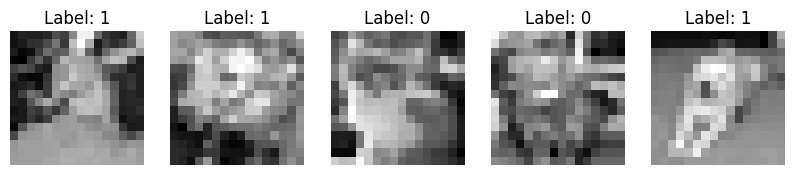

In [ ]:
import matplotlib.pyplot as plt

# Seleccionamos 5 índices aleatorios
indices_random = np.random.choice(range(data.shape[0]), size=5, replace=False)


plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices_random):
    plt.subplot(1, 5, i+1)
    # La imagen original está flatten, se convierte a 16x16
    img_16x16 = data[idx].reshape(16,16)
    plt.imshow(img_16x16, cmap='gray')
    plt.title(f"Label: {labels[idx]}")
    plt.axis('off')
plt.show()

## b.4) Definición de los conjuntos de datos.

La función `train_test_split` de scikit-learn se utiliza para dividir un dataset en dos subconjuntos: **entrenamiento** y **testeo**. Esto permite evaluar el rendimiento del modelo en datos que *no fueron vistos durante el entrenamiento*, lo cual es fundamental para medir su capacidad de generalización.

En este caso:
- Se aplicó `train_test_split` para tomar $20000$ imágenes como conjunto de entrenamiento y usar el resto como conjunto de prueba.
- La división fue *aleatoria pero reproducible* utilizando un `random_state` (para obtener el mismo modelo ante un eventual reinicio el entorno de ejecución de Colab).
- Esta estrategia asegura que el modelo aprenda patrones con una parte del dataset y se evalúe de forma objetiva con otra parte, evitando el sobreajuste.

En resumen, `train_test_split` permite separar los datos de forma controlada para entrenar el modelo y evaluar su desempeño con nuevos ejemplos.



In [ ]:
from sklearn.model_selection import train_test_split

# Separamos en train (20,000 muestras) y test (resto)
# Estrictamente, se pide un train con 20k. El test será el sobrante.
X_train, X_test, y_train, y_test = train_test_split(
    data,
    labels,
    train_size=20000,
    shuffle=True,
    random_state=42
)

print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)

Tamaño X_train: (20000, 256)
Tamaño X_test: (4998, 256)


# (c) *Clasificación*

## c.1) Regresión logística sin regularización.


La clase `LogisticRegression` de scikit-learn es un estimador lineal utilizado para resolver problemas de clasificación. Por defecto, implementa la regresión logística con regularización utilizando solucionadores como 'newton-cg', 'sag', 'saga' y 'lbfgs'.

En este caso particular, se configura con `penalty=None` para desactivar la regularización, es decir, se entrena el modelo sin aplicar ningún término penalizador.

Se establece `max_iter=10_000` para garantizar que el algoritmo tenga suficiente número de iteraciones para alcanzar la convergencia, evitando así una finalización prematura del entrenamiento o advertencias relacionadas con la no convergencia.

Cuando se utiliza `penalty=None`, el solucionador 'liblinear' no es compatible, pero los demás mencionados sí lo son. Se evaluó el desempeño con diferentes solvers y los resultados fueron similares. Por esta razón, se optó por 'lbfgs', ya que la documentación destaca su robustez general. No obstante, para conjuntos de datos grandes, el solver 'saga' suele ofrecer mayor eficiencia computacional.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Se crea el modelo sin regularización ('penalty="none"')
model_no_reg = LogisticRegression(
    penalty=None,
    max_iter=10_000,
    solver='lbfgs'
)

# Entrenamiento
model_no_reg.fit(X_train, y_train)

print("Modelo entrenado (sin regularización).")


Modelo entrenado (sin regularización).


## c.2) Exactitud o *accuracy* de entrenamiento y testeo.

La exactitud (*accuracy*) es una métrica de desempeño para evaluar modelos de clasificación. Se define como la proporción de predicciones correctas sobre el total de muestras evaluadas.

$$\text{Accuracy}=\frac{\text{# de prediciones acertadas}}{\text{# total de muestras}}=\frac{1}{m}\sum_{i=1}^m\mathbf{1}(\hat{y}_i=y_i)$$
donde:
- $m$: es el número total de muestras.
- $y_i$: es la etiqueta verdadera de la muestra $i$.
- $\hat{y}_i$: es la etiqueta predicha por el modelo.
- $\mathbb{1}(\cdot)$: es la función indicadora.

Se puede implementar fácilmente como el promedio de un array resultado de la comparación lógica de igualdad entre el array de etiquetas verdaderas y el de las predichas por el modelo.

```python
    return np.mean(y_true == y_pred)
```

Alternativamente se puede utilizar `sklearn.metrics.accuracy_score`

In [ ]:
def accuracy(y_true, y_pred):
    """
    Calcula la exactitud (accuracy).
    """
    return np.mean(y_true == y_pred)

# Predicciones
y_pred_train = model_no_reg.predict(X_train)
y_pred_test  = model_no_reg.predict(X_test)

acc_train = accuracy(y_train, y_pred_train)
acc_test  = accuracy(y_test, y_pred_test)

print(f"Accuracy entrenamiento (sin regularización): {acc_train:.6f}")
print(f"Accuracy test (sin regularización): {acc_test:.6f}")

Accuracy entrenamiento (sin regularización): 0.589750
Accuracy test (sin regularización): 0.560024


## c.3) Entropía cruzada o cross-entropy a partir de la salida de predict_log_proba

La entropía cruzada es una medida que cuantifica cuan diferentes son la distribución de probabilidad que predice un modelo y la distribución real (etiquetas). Matemáticamente se define como el promedio para todas las muestras del negativo del logaritmo natural de la probabilidad predicha de la clase real. Es decir, a menor entropía cruzada, mejor coincide la predicción con la realidad.

A continuación, muestra una posible implementación:

```python
    return -np.mean(log_probs[np.arange(len(y_true)), y_true])

```
Sus parámetros son:
- `y_true`: Es un array unidimensional con las etiquetas verdaderas para cada muestra. Cada elemento del array es un elemento que representa la clase real de la muestra.
- `log_probs`: Es una matriz bidimensional de *log-probabilidades* (con `m` filas y `k` columnas si hay `k` clases (la salida de `predict_log_proba(X)`). Es decir, `log_probs[i, j]` es el logaritmo de la probabilidad pronosticada para la clase 'j' en la muestra 'i'

Funciona de la siguiente manera:
1. Selección de la log-probabilidad verdadera:
  - `np.arange(len(y_true))` genera un array con índices `[0, 1, ..., m-1]`.
  - `log_probs[np.arange(len(y_true)), y_true]` usa indexación avanzada para extraer, de cada fila `i`, la columna correspondiente a la clase verdadera `y_true[i]`. En otras palabras, para cada muestra `i`, recupera `log_probs[i, y_true[i]]`, que es el logaritmo de la probabilidad asignada a la clase correcta.
2. Cálculo de la entropía cruzada:
  - Al tomar el promedio (mean) de esos valores para todas las muestras, se obtiene:
  $$\text{Cross-Entropy}=-\frac{1}{m}\sum_{i=1}^m\ln\left(p\left(\text{clase real}\mid x^{(i)}\right)\right)$$

  - `-np.mean(log_probs[np.arange(len(y_true)), y_true])` reproduce esa operación.
    - `log_probs[np.arange(len(y_true)), y_true]` da los valores de $\ln\left(p\left(\text{clase real}\mid x^{(i)}\right)\right)$
    - `np.mean(...)` toma el promedio de esos valores
    - el signo (`-`) invierte el signo de ese promedio

En síntesis, el código selecciona el log de la probabilidad de la clase correcta para cada muestra, luego toma el promedio y aplica un signo negativo.

Alternativamente, se puede utilizar `sklearn.metrics.log_loss` (con `predict_proba`)

In [ ]:
def cross_entropy(y_true, log_probs):
    # Se toma el log-probabilidad correspondiente a la clase verdadera para cada muestra.
    return -np.mean(log_probs[np.arange(len(y_true)), y_true])


# log_proba para set de entrenamiento y test
train_log_proba = model_no_reg.predict_log_proba(X_train)
test_log_proba  = model_no_reg.predict_log_proba(X_test)

ce_train = cross_entropy(y_train, train_log_proba)
ce_test  = cross_entropy(y_test, test_log_proba)

print(f"Cross-entropy (train): {ce_train:.6f}")
print(f"Cross-entropy (test):  {ce_test:.6f}")

Cross-entropy (train): 0.671217
Cross-entropy (test):  0.689109


In [ ]:
train_log_proba[np.arange(len(y_train)),y_train]

array([-0.64054865, -0.50279934, -0.62307702, ..., -0.61863683,
       -0.69044177, -0.54042752])

## c.4) Clasificación del **Phaistos Disc Sign Cat**

A modo de ejemplo, se tomó el símbolo utilizado en la guía de ejercicios para representar un consejo (*Phaistos Disc Sign Cat*). Se capturó la imagen correspondiente, se alojó en un servicio gratuito de hospedaje de imágenes y luego se aplicaron los mismos pasos de preprocesamiento que al conjunto de entrenamiento y test (redimensionar, convertir a escala de grises, etc.). Finalmente, se utilizó el modelo para intentar predecir si la imagen correspondía a un “gato” o a un “perro”.

El resultado no fue exitoso para la clasificación como “gato”: las probabilidades estimadas fueron 0.485 para gato y 0.515 para perro, lo que llevó al modelo a clasificarla erróneamente como perro.

Este ejemplo ilustra las limitaciones del modelo cuando se enfrenta a imágenes que salen de su distribución típica de entrenamiento.

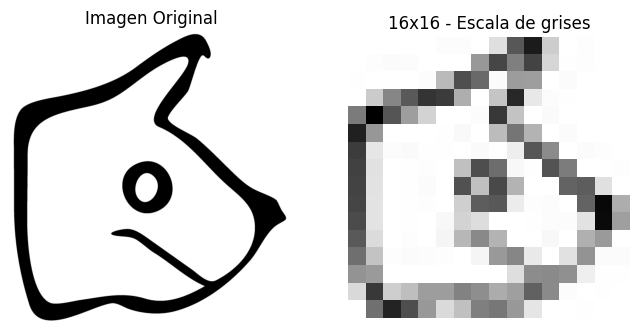

Predicción del modelo: DOG
Probabilidades [clase=0 (cat), clase=1 (dog)]: [0.47387631 0.52612369]


In [ ]:
import requests
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

# URL de la imagen "consejo de la guía"
url = "https://i.ibb.co/tTfkc8DH/image.png"

# Descarga de la imagen
response = requests.get(url)
img = Image.open(io.BytesIO(response.content))

# Imagen original
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Imagen Original")
plt.axis("off")


# Procesamiento de la imagen: redimensionar a 16x16 y convertir a escala de grises
img_resized = img.resize((16, 16),Image.LANCZOS, reducing_gap=2)
img_gray = img_resized.convert("L")

plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap="gray")
plt.title("16x16 - Escala de grises")
plt.axis("off")
plt.show()

# Aplanamiento y clasificar
img_array = np.array(img_gray)
img_plana = img_array.flatten()
img_plana = img_plana.reshape(1, -1)
img_plana = img_plana/255.0


# Predecir
prediction = model_no_reg.predict(img_plana)
proba = model_no_reg.predict_proba(img_plana)

clase = "DOG" if prediction[0] == 1 else "CAT"
print(f"Predicción del modelo: {clase}")
print("Probabilidades [clase=0 (cat), clase=1 (dog)]:", proba[0])


# (d) *Regularización*

Como se aprendió en el trabajo práctico anterior, la regularización es una técnica que busca evitar el sobreajuste (overfitting) controlando la complejidad de un modelo. En términos prácticos, introduce un término de penalización sobre los parámetros (pesos) del modelo dentro de la función de costo. Esto obliga a que dichos parámetros no crezcan desmesuradamente y, por lo tanto, se mejore la capacidad de generalización del modelo.

- En **regresión logística**, la regularización L2 penaliza la suma de los cuadrados de los coeficientes. Esto reduce la magnitud de todos los coeficientes.
- Al combinar un **mapa polinómico de orden 2** (que aumenta de manera significativa el número de características) con una penalización, se controla el riesgo de que el modelo, al disponer de muchas variables, se vuelva demasiado complejo y termine sobreajustando.

Así se mantiene un compromiso entre la complejidad del modelo y su capacidad de predecir correctamente. Es decir, la regularización en este contexto garantiza que el aumento de la dimensionalidad (debido al mapeo polinómico) no provoque un modelo extremadamente complejo y sobreajustado.

Para implementar el mapa polinómico de orden 2 se utiliza `PolynomialFeatures` de sklearn con los argumentos `degree=2` (para indicar el orden) y con `includebias=False` para que no se añada la columna de sesgo, ya que el modelo de regresión logística lo agrega por defecto.

La regresión logística se realiza nuevamente mediante `LogisticRegression` de scikit-learn, esta vez con el parámetro `penalty=l2`, para penalizar la suma de los cuadrados de los coeficientes. Para establecer el valor de `C` (inversa de la tasa de aprendizaje) se ejecutan múltiples ajustes y se comparan los resultados de accuracy de entrenamiento y testeo como se muestra a continuación.

Accuracy / C | 100    | 10     | 1      | 0.5    | 0.25   | 0.125  | **0.1125** | 0.1      | 0.075  | 0.05   | 0.01   |
-------------|--------|--------|--------|--------|--------|--------|--------|----------|--------|--------|--------|
Entrenamiento| 0.9920 | 0.9816 | 0.9044 | 0.8730 | 0.8414 | 0.8080 | **0.8041** | 0.7974   | 0.7871 | 0.7687 | 0.7151 |
Test         | 0.6186 | 0.6279 | 0.6497 | 0.6567 | 0.6627 | 0.6637 | **0.6643** | 0.6637   | 0.6633 | 0.6603 | 0.6473 |

Finalmente, se vuelve a entrenar el modelo para el valor de `C = 0.1125` con mejores resultados.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import gc
gc.collect()


# Generación del mapa polinómico de grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

# Creación del modelo con regularización L2
model_reg = LogisticRegression(
    penalty='l2',
    C=0.1125,       # se ajusta
    max_iter=10000,  # se aumenta si no converge
    solver='lbfgs'
)

# Entrenamiento
model_reg.fit(X_train_poly, y_train)

# Medición de la accuracy
y_pred_train_reg = model_reg.predict(X_train_poly)
y_pred_test_reg  = model_reg.predict(X_test_poly)

acc_train_reg = accuracy(y_train, y_pred_train_reg)
acc_test_reg  = accuracy(y_test, y_pred_test_reg)

print(f"Accuracy entrenamiento (con regularización, grado 2): {acc_train_reg:.4f}")
print(f"Accuracy test (con regularización, grado 2):         {acc_test_reg:.4f}")



Accuracy entrenamiento (con regularización, grado 2): 0.8056
Accuracy test (con regularización, grado 2):         0.6589


# (e) Curva ROC

La **curva ROC** (Receiver Operating Characteristic) es una herramienta gráfica esencial para evaluar el rendimiento de clasificadores binarios.

Sus principales características son:

- Representa la relación entre la tasa de verdaderos positivos (TPR o sensibilidad) y la tasa de falsos positivos (FPR) a lo largo de diferentes umbrales de decisión. Es decir, muestra cómo varía la capacidad del clasificador para identificar correctamente las instancias positivas en función del número de instancias negativas incorrectamente clasificadas como positivas.

- Ejes de la gráfica:
  - Eje X (FPR): Proporción de negativos que fueron clasificados erróneamente como positivos.
  - Eje Y (TPR): Proporción de positivos correctamente identificados.

- Interpretación del área bajo la curva (AUC):

  El AUC cuantifica la capacidad del modelo para discriminar entre clases.
  
  - Un AUC de 1 indica un clasificador perfecto.
  - Un AUC de 0.5 indica que el clasificador es equivalente a una decisión aleatoria.

- Su uso permite comparar modelos y seleccionar el umbral de decisión óptimo.
  Es especialmente útil en situaciones con clases desbalanceadas, ya que se centra en las tasas de aciertos y errores sin considerar la distribución de clases.

En resumen, la curva ROC es una representación gráfica que ilustra la eficacia de un modelo de clasificación binaria al cambiar el umbral de decisión, y el AUC proporciona una media única y robusta de su capacidad discriminativa.

De la gráfica resultante se obtienen las siguientes conclusiones:
- **Beneficio de la regularización**: La curva del modelo con regularización domina claramente a la curva sin regularización: su mayor área bajo la curva implica que el **modelo regularizado discrimina mejor** entre gatos y perros.
- **Comparación con el clasificador aleatorio**: Como se esperaba, ambos modelos superan al AUC de la línea base aleatoria, confirmando que **están extrayendo información útil** de las características.
- **Efecto del sobreajuste**: El modelo regularizado obtiene mejor AUC, esto sugiere que la penalización aplicada a los coeficientes ayuda a evitar un sobrejuste y a mejorar la **capacidad de generalización**

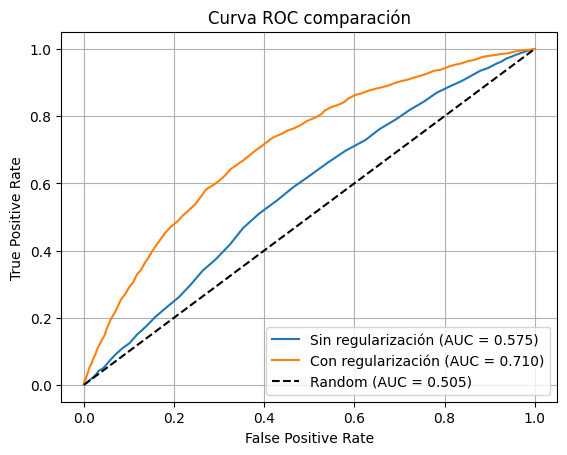

In [ ]:
from sklearn.metrics import auc
gc.collect()
def compute_roc(y_true, y_scores, num_thresholds=100):
    # Lista de umbrales entre 0 y 1
    thresholds = np.linspace(0, 1, num_thresholds)
    tpr_list = []
    fpr_list = []

    for thresh in thresholds:
        # Clasificación binaria según el umbral
        y_pred = (y_scores >= thresh).astype(int) #Convierte a un array de enteros

        # Cálculo de VP, VN, FP, FN
        # Verdaderos positivos
        TP = np.sum((y_pred == 1) & (y_true == 1))
        # Verdaderos negativos
        TN = np.sum((y_pred == 0) & (y_true == 0))
        # Falsos positivos
        FP = np.sum((y_pred == 1) & (y_true == 0))
        # Falsos negativos
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Cálculo de TPR y FPR
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0 # evita una división por cero
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0

        tpr_list.append(TPR)
        fpr_list.append(FPR)

    return np.array(fpr_list), np.array(tpr_list), thresholds



# 1) Modelo sin regularización
y_score_no_reg = model_no_reg.predict_proba(X_test)[:,1]  # prob. de clase=1

# 2) Modelo con regularización
y_score_reg = model_reg.predict_proba(X_test_poly)[:,1]   # prob. de clase=1

# 3) Modelo al azar (random).
np.random.seed(42)
y_score_rand = np.random.rand(len(y_test))

# Curva ROC
fpr_no_reg, tpr_no_reg, _ = compute_roc(y_test, y_score_no_reg)
fpr_reg,    tpr_reg,    _ = compute_roc(y_test, y_score_reg)
fpr_rand,   tpr_rand,   _ = compute_roc(y_test, y_score_rand)

auc_no_reg = auc(fpr_no_reg, tpr_no_reg)
auc_reg    = auc(fpr_reg, tpr_reg)
auc_rand   = auc(fpr_rand, tpr_rand)


# Gráfica
plt.plot(fpr_no_reg, tpr_no_reg, label=f'Sin regularización (AUC = {auc_no_reg:.3f})')
plt.plot(fpr_reg, tpr_reg, label=f'Con regularización (AUC = {auc_reg:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label=f'Random (AUC = {auc_rand:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC comparación')
plt.legend()
plt.grid(True)
plt.show()
